In [1]:
import sys
import math

import torch

In [2]:
sys.path.append("..")

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams["axes.labelsize"] = 23
mpl.rcParams['legend.fontsize'] = 20
mpl.rcParams['axes.titlesize'] = 28
mpl.rcParams['text.usetex'] = True # comment out this line if the machine does not have TeX installed
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [4]:
d = 2
seeds = torch.arange(9)

acc1s_mc = torch.stack([torch.load(f"output/bayes_accuracies_{d}_seed_{seed}_mc.pt") for seed in seeds])
acc2s_mc = torch.stack([torch.load(f"output/three_stage_accuracies_{d}_seed_{seed}_mc.pt") for seed in seeds])
acc1s_nmc = torch.stack([torch.load(f"output/bayes_accuracies_{d}_seed_{seed}_nmc.pt") for seed in seeds])
acc2s_nmc = torch.stack([torch.load(f"output/three_stage_accuracies_{d}_seed_{seed}_nmc.pt") for seed in seeds])

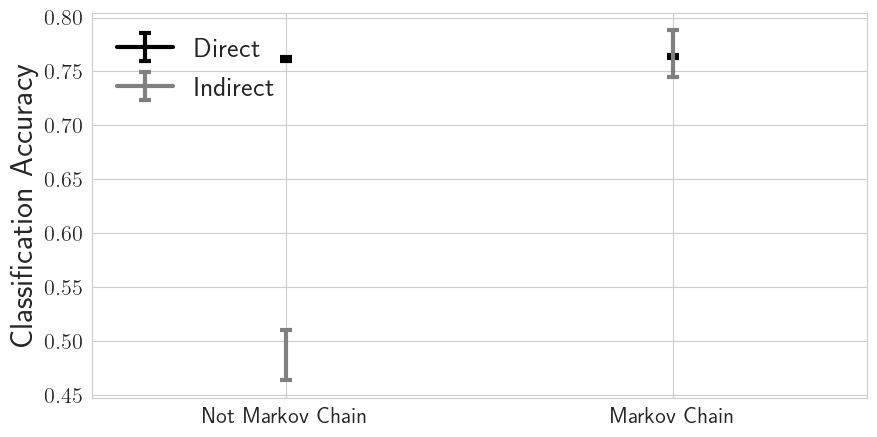

In [5]:
sns.set_style("whitegrid")

pscale = 5
s = 100
color1 = "black"
color2 = "gray"
color3 = "indigo"
color4 = "darkgoldenrod"

linewidth = 3
elinewidth = 2
capsize = 4
s_scale = 0.3

fig, ax = plt.subplots(1, 1, figsize=(2 * pscale, pscale))

ax.errorbar([1], 
            acc1s_mc.mean(dim=0),
            yerr=acc1s_mc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color1, 
            linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
            label="Direct"
    )
ax.errorbar([1], 
            acc2s_mc.mean(dim=0),
            yerr=acc2s_mc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color2, 
            linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
            label="Indirect"
    )

ax.errorbar([0], 
            acc1s_nmc.mean(dim=0),
            yerr=acc1s_nmc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color1, 
            #linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
    )
ax.errorbar([0], 
            acc2s_nmc.mean(dim=0),
            yerr=acc2s_nmc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color2, 
            #linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
    )

ax.set_ylabel("Classification Accuracy")
ax.legend(loc = "upper left", frameon=False)
ax.set_xticks([0, 1])
ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(["Not Markov Chain", "Markov Chain"])
plt.savefig(f"../figures/simulation_gaussian_multiclip.pdf", bbox_inches="tight")
plt.show()

In [12]:
d = 2
seeds = torch.arange(9)
loss = "clip"
prompt = "pzy"

acc1s_mc = torch.stack([torch.load(f"output/bayes_accuracies_{d}_seed_{seed}_mc.pt") for seed in seeds])
acc2s_mc = torch.stack([torch.load(f"output/three_stage_accuracies_{d}_seed_{seed}_mc.pt") for seed in seeds])
acc3s_mc = torch.stack([torch.load(f"output/clip_accuracies_{d}_seed_{seed}_loss_{loss}_prompt_{prompt}_mc.pt") for seed in seeds])
acc1s_nmc = torch.stack([torch.load(f"output/bayes_accuracies_{d}_seed_{seed}_nmc.pt") for seed in seeds])
acc2s_nmc = torch.stack([torch.load(f"output/three_stage_accuracies_{d}_seed_{seed}_nmc.pt") for seed in seeds])
acc3s_nmc = torch.stack([torch.load(f"output/clip_accuracies_{d}_seed_{seed}_loss_{loss}_prompt_{prompt}_nmc.pt") for seed in seeds])


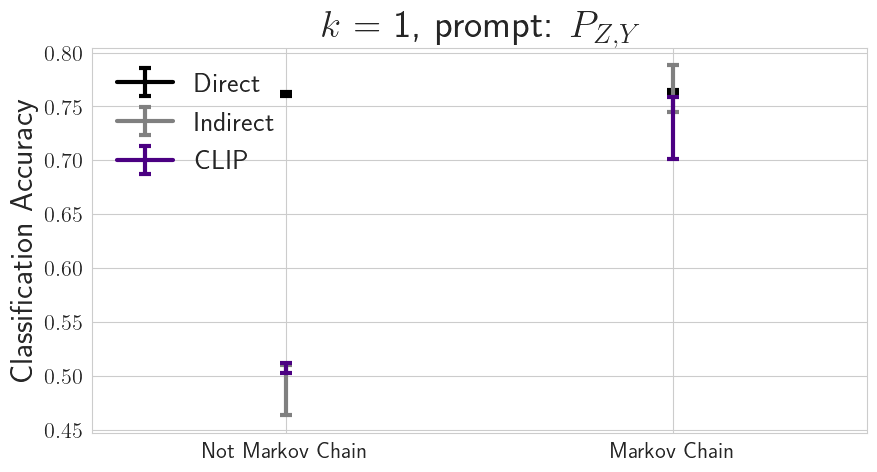

In [13]:
sns.set_style("whitegrid")

pscale = 5
s = 100
color1 = "black"
color2 = "gray"
color3 = "indigo"
color4 = "darkgoldenrod"

linewidth = 3
elinewidth = 2
capsize = 4
s_scale = 0.3

fig, ax = plt.subplots(1, 1, figsize=(2 * pscale, pscale))

prompt_dict = {"pwy": r"$P_{W, Y}$",
               "pzy": r"$P_{Z, Y}$"}
loss_dict = {"clip": 1, "doubly_centered": 2}

ax.errorbar([1], 
            acc1s_mc.mean(dim=0),
            yerr=acc1s_mc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color1, 
            linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
            label="Direct"
    )
ax.errorbar([1], 
            acc2s_mc.mean(dim=0),
            yerr=acc2s_mc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color2, 
            linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
            label="Indirect"
    )
ax.errorbar([1], 
            acc3s_mc.mean(dim=0),
            yerr=acc3s_mc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color3, 
            linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
            label="CLIP"
    )

ax.errorbar([0], 
            acc1s_nmc.mean(dim=0),
            yerr=acc1s_nmc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color1, 
            #linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
    )
ax.errorbar([0], 
            acc2s_nmc.mean(dim=0),
            yerr=acc2s_nmc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color2, 
            #linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
    )
ax.errorbar([0], 
            acc3s_nmc.mean(dim=0),
            yerr=acc3s_nmc.std(dim=0) / math.sqrt(len(seeds)),    
            color=color3, 
            #linewidth=linewidth, 
            #elinewidth=linewidth,
            capsize=capsize,
            capthick=linewidth,
    )

ax.set_title(f"$k$ = {loss_dict[loss]}, prompt: {prompt_dict[prompt]}")
ax.set_ylabel("Classification Accuracy")
ax.legend(loc = "upper left", frameon=False)
ax.set_xticks([0, 1])
ax.set_xlim(-0.5, 1.5)
ax.set_xticklabels(["Not Markov Chain", "Markov Chain",])
plt.savefig(f"../figures/simulation_clip_{loss}_{prompt}_multiclip.pdf", bbox_inches="tight")
plt.show()